# Explore the data

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Load the data

In [2]:
raw_data = pd.read_csv('unisef_data.csv', index_col='Country')
raw_data

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018,GDP per capita (current US$) 2018,At least basic drinking water services (%) 2017,At least basic sanitation services (%) 2017
Country,,,,,
Afghanistan,62.0,66.0,556.3,67.0,43.0
Albania,9.0,80.0,4532.9,91.0,98.0
Algeria,23.0,78.0,4048.3,94.0,88.0
Andorra,3.0,NaN,39134.4,100.0,100.0
Angola,77.0,64.0,4095.8,56.0,50.0
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),25.0,76.0,16054.5,96.0,94.0
Viet Nam,21.0,79.0,2365.6,95.0,84.0
Yemen,55.0,68.0,963.5,63.0,59.0


# Cluster Analysis

### Import relevant libraries

In [3]:
from sklearn.cluster import KMeans

## Under-5 Mortality rate & Life expectancy: females

### Selecting the features

In [4]:
x = raw_data.iloc[:,:2]
x

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018
Country,,
Afghanistan,62.0,66.0
Albania,9.0,80.0
Algeria,23.0,78.0
Andorra,3.0,NaN
Angola,77.0,64.0
...,...,...
Venezuela (Bolivarian Republic of),25.0,76.0
Viet Nam,21.0,79.0
Yemen,55.0,68.0


### Preprocessing

In [5]:
x.isnull().sum()

Under-5 mortality rate (deaths per 1,000 live births) 2018     7
Life expectancy: female 2018                                  18
dtype: int64

#### Remove rows with missing values

In [7]:
x_no_mv = x.dropna(axis=0)
x_no_mv.describe(include='all')

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018
count,184.000000,184.000000
mean,28.657609,74.608696
std,28.859508,7.786715
min,2.000000,55.000000
25%,7.000000,69.000000
50%,16.500000,76.000000
75%,46.000000,80.000000
max,122.000000,88.000000


### Use Elbow Method to determine optimal number of clusters

In [11]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_no_mv)
    wcss.append(kmeans.inertia_)

wcss

[163511.25543478262,
 41253.38636363637,
 19790.32251562185,
 12180.169884939622,
 7301.924875505758,
 5020.818724712107,
 4074.3727372085787,
 3195.820437656279,
 2512.105136933563]

Text(0, 0.5, 'WCSS')

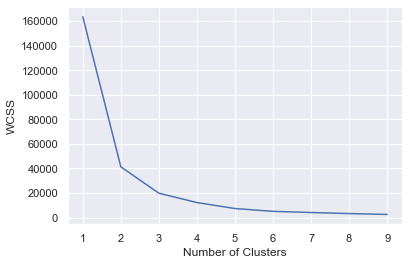

In [12]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

It appears that the optimal number of clusters may be 2 or 3 according to the elbow method

### Clustering

#### 2 clusters

In [13]:
kmeans = KMeans(2)
results = kmeans.fit_predict(x_no_mv)
results

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0])

In [14]:
x_w_clusters = x_no_mv.copy()
x_w_clusters['cluster'] = results
x_w_clusters

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018,cluster
Country,,,
Afghanistan,62.0,66.0,0
Albania,9.0,80.0,1
Algeria,23.0,78.0,1
Angola,77.0,64.0,0
Antigua and Barbuda,6.0,78.0,1
...,...,...,...
Venezuela (Bolivarian Republic of),25.0,76.0,1
Viet Nam,21.0,79.0,1
Yemen,55.0,68.0,0


Text(0, 0.5, 'Life expectancy: female 2018')

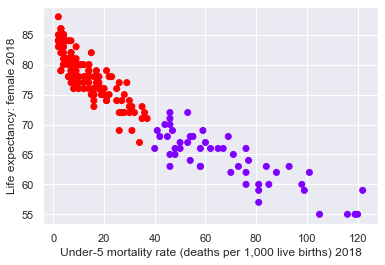

In [15]:
plt.scatter(x_w_clusters['Under-5 mortality rate (deaths per 1,000 live births) 2018'],x_w_clusters['Life expectancy: female 2018'],c=x_w_clusters['cluster'],cmap='rainbow')
plt.xlabel('Under-5 mortality rate (deaths per 1,000 live births) 2018')
plt.ylabel('Life expectancy: female 2018')

##### Analysis of plot and clusters

The data seems to be relatively linear with an inverse relationship between Under-5 mortality rate and Life exprectancy of females. The two clusters could be labeled as "Countries with low under-5 mortality rates and high female life expectancy" and "Countries with high under-5 mortality rates and low female life expectancy"

#### 3 clusters

In [16]:
kmeans = KMeans(3)
results = kmeans.fit_predict(x_no_mv)
results

array([1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1])

In [17]:
x_w_clusters = x_no_mv.copy()
x_w_clusters['cluster'] = results
x_w_clusters

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018,cluster
Country,,,
Afghanistan,62.0,66.0,1
Albania,9.0,80.0,0
Algeria,23.0,78.0,0
Angola,77.0,64.0,2
Antigua and Barbuda,6.0,78.0,0
...,...,...,...
Venezuela (Bolivarian Republic of),25.0,76.0,0
Viet Nam,21.0,79.0,0
Yemen,55.0,68.0,1


Text(0, 0.5, 'Life expectancy: female 2018')

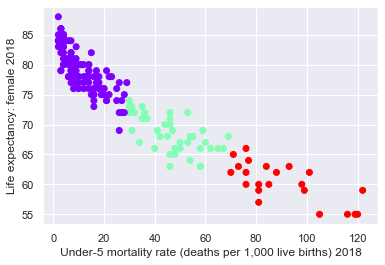

In [18]:
plt.scatter(x_w_clusters['Under-5 mortality rate (deaths per 1,000 live births) 2018'],x_w_clusters['Life expectancy: female 2018'],c=x_w_clusters['cluster'],cmap='rainbow')
plt.xlabel('Under-5 mortality rate (deaths per 1,000 live births) 2018')
plt.ylabel('Life expectancy: female 2018')

##### Analysis of plot and clusters

The data seems to be relatively linear with an inverse relationship between Under-5 mortality rate and Life exprectancy of females. The three clusters could be labeled as "Countries with low under-5 mortality rates and high female life expectancy", "Countries with adverage under-5 mortality rates and adverage female life expectancy", and "Countries with high under-5 mortality rates and low female life expectancy"